<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [295]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import math
from IPython.display import HTML, display

seaborn.set_context('talk')

In [296]:
!pip install ipdb

In [297]:
def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)
    
    display(HTML('<img src onerror="{}" style="display:none">'.format(script)))

In [298]:
import ipdb

In [299]:
cell_color = '#e6b530'
set_background(cell_color)

import math
import time

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [300]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [301]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

<span style='background:#e6b530'> Limpieza de datos  </span>


In [302]:
cell_color = '#e6b530'
set_background(cell_color)
df.isna().sum()

profile_gender                                     0
profile_age                                        0
work_country                                       0
work_province                                      0
profile_years_experience                           0
work_years_in_company                              0
work_years_in_current_position                     0
work_people_in_charge_of                           0
profile_studies_level                              0
profile_studies_level_state                        0
profile_career                                   299
profile_university                               534
profile_specialization_courses                     0
profile_open_source_contributions                  0
profile_programming_as_hobby                       0
work_role                                          0
tools_platform                                     2
tools_programming_languages                        1
tools_frameworks                              

<span style='background:#e6b530'>Se detecta que existen  filas que las cuales tienen el campo salary_monthly_NETO sin información (212 filas en esta condición)</span>

In [303]:
set_background(cell_color)
cantidad_salary_monthly_NETO_nulos = df.salary_monthly_NETO.isna().sum()
cantidad_filas_df = df.shape[0]
print (" Total de filas df: {0}, total de filas donde salary_monthly_NETO no tiene valoes: {1} , % {2} ".format(cantidad_filas_df, cantidad_salary_monthly_NETO_nulos ,   cantidad_salary_monthly_NETO_nulos / cantidad_filas_df * 100 ))

 Total de filas df: 6095, total de filas donde salary_monthly_NETO no tiene valoes: 212 , % 3.4782608695652173 


<span style='background:#e6b530'> Corregimos las filas que no tiene salario NETO. Para ello tomamos el bruto y lo multiplicamos x 0,83 </span>

In [304]:
set_background(cell_color)
#Para las filas que no tienen neto, hacemos BRUTO * 0.83
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 0.83 if math.isnan(x.salary_monthly_NETO)   else x['salary_monthly_NETO'], axis=1)    

<span style='background:#e6b530'>Controlamos que no existan más filas con NETO sin valores (debe ser 0 la cantidad de filas que no tienen salario neto) </span>

In [305]:
set_background(cell_color)
df['salary_monthly_BRUTO'].isna().sum()

0

<span style='background:#e6b530'>Vemos cuantos casos tenemos de salarios Netos mayores a salarios brutos</span>

In [306]:
set_background(cell_color)
df[df.salary_monthly_BRUTO < df.salary_monthly_NETO ].shape[0]

156

<span style='background:#e6b530'>Vamos a poner como bruto al neto, y luego recalculamos en neto (no se contempla descuento de ganancias, descontamos un 17% entre jub, obra soc y otros)
</span>


In [307]:
set_background(cell_color)
df['recalculate_salary'] = df.apply(lambda x:  x['salary_monthly_NETO'] >  x['salary_monthly_BRUTO'], axis=1)    

df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_NETO'] if x['recalculate_salary']   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 0.83 if x['recalculate_salary']   else x['salary_monthly_NETO'], axis=1)    

<span style='background:#e6b530'>Verificamos que no existan mas salarios netos matores a salarios brutos </span>

In [308]:
set_background(cell_color)
df[df.salary_monthly_BRUTO < df.salary_monthly_NETO ].shape[0]

0

In [309]:
df['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count       6095.00
mean       96356.53
std        97372.66
min            0.83
25%        51480.00
50%        78000.00
75%       108000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

<span style='background:#e6b530'>Normalizamos el formato de los sueldos a unidades de mil (82 --> 82000) </span>

In [310]:
set_background(cell_color)
limit = 200
df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 1000 if x['salary_monthly_BRUTO'] < limit   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_NETO'] * 1000 if x['salary_monthly_NETO'] < limit   else x['salary_monthly_NETO'], axis=1)    

In [311]:
set_background(cell_color)
limit_us = 10000
filtro_dolar = 'Mi sueldo está dolarizado'

df_salary_to_convert = ((df.salary_monthly_NETO <= limit_us) & (df.salary_in_usd == filtro_dolar) )

print(f"Cantidad de salarios <= {limit_us} : {df_salary_to_convert.sum()}, % respecto al total {df_salary_to_convert.sum()  / df.shape[0] }")



Cantidad de salarios <= 10000 : 17, % respecto al total 0.002789171452009844


In [312]:
df[df_salary_to_convert][['salary_monthly_NETO','salary_in_usd']]

,salary_monthly_NETO,salary_in_usd
224,5000.0,Mi sueldo está dolarizado
924,6000.0,Mi sueldo está dolarizado
1425,260.0,Mi sueldo está dolarizado
1701,307.1,Mi sueldo está dolarizado
1828,4000.0,Mi sueldo está dolarizado
2376,610.0,Mi sueldo está dolarizado
3563,373.5,Mi sueldo está dolarizado
3632,1311.0,Mi sueldo está dolarizado
3771,4300.0,Mi sueldo está dolarizado
3791,685.0,Mi sueldo está dolarizado


<span style='background:#e6b530'>
Convertimos a $ los sueldos dolarizados. Tomamos como fuente el valor reportado en https://www.cotizacion-dolar.com.ar/dolar-blue-historico-2020.php . Se toma fecha 25/08/2020, valor venta
</span>

In [313]:
set_background(cell_color)
valor_dolar = 137

df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * valor_dolar if (( x['salary_monthly_BRUTO']  < limit_us) & (x['salary_in_usd'] == filtro_dolar ))   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO']  = df.apply(lambda x: x['salary_monthly_NETO']  * valor_dolar if (( x['salary_monthly_NETO']  < limit_us) & (x['salary_in_usd'] == filtro_dolar ))  else x['salary_monthly_NETO'], axis=1)    


<span style='background:#e6b530'> Controlamos que no queden sueldos en dolares menores a 10.000 </span>

In [314]:
set_background(cell_color)

#df_salary_to_convert = ((df.salary_monthly_NETO <= limit_us) & (df.salary_in_usd == filtro_dolar) )

print(f"Cantidad de salarios <= {limit_us} : {df_salary_to_convert.sum()}, % respecto al total {df_salary_to_convert.sum()  / df.shape[0] }")



Cantidad de salarios <= 10000 : 17, % respecto al total 0.002789171452009844


In [315]:
set_background(cell_color)
df[df.salary_in_usd==filtro_dolar][['salary_monthly_NETO','salary_in_usd']]

,salary_monthly_NETO,salary_in_usd
14,80000.0,Mi sueldo está dolarizado
25,98700.0,Mi sueldo está dolarizado
41,280000.0,Mi sueldo está dolarizado
43,126500.0,Mi sueldo está dolarizado
60,345420.0,Mi sueldo está dolarizado
...,...,...
6021,210000.0,Mi sueldo está dolarizado
6024,400000.0,Mi sueldo está dolarizado
6079,80000.0,Mi sueldo está dolarizado
6080,391000.0,Mi sueldo está dolarizado


<span style='background:#e6b530'> Vemos la cantidad de salarios que queda por debajo de 10000. </span>

In [316]:
set_background(cell_color)
df[df.salary_monthly_NETO <= limit_us].shape

(29, 49)

In [317]:
set_background(cell_color)
index_to_drop = df[df.salary_monthly_NETO <= limit_us].index

In [318]:
set_background(cell_color)
df.drop(index_to_drop, inplace = True)

In [319]:
set_background(cell_color)
print(f"Cantidad de salarios <= {limit_us} : {(df.salary_monthly_NETO <= limit_us).sum()}, % respecto al total {(df.salary_monthly_NETO <= limit_us).sum()  / df.shape[0] }")


Cantidad de salarios <= 10000 : 0, % respecto al total 0.0


In [320]:
df.shape

(6066, 49)

In [321]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO',  'work_role']

In [322]:
df['salary_monthly_BRUTO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count       6066.00
mean      128704.86
std       126031.49
min          200.00
25%        65000.00
50%       100000.00
75%       149000.00
max      2180000.00
Name: salary_monthly_BRUTO, dtype: object

In [323]:
df['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count       6066.00
mean       99697.19
std        97557.61
min        10700.00
25%        54000.00
50%        80000.00
75%       110000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

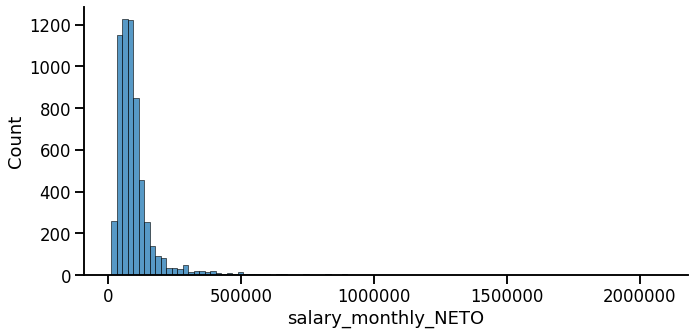

In [324]:
#tamaño de bins = # de barritas
seaborn.displot(df['salary_monthly_NETO'], aspect=2, bins = 100)
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')

#plotting salarios para ver cuan frecuentes son los mas altos

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [325]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


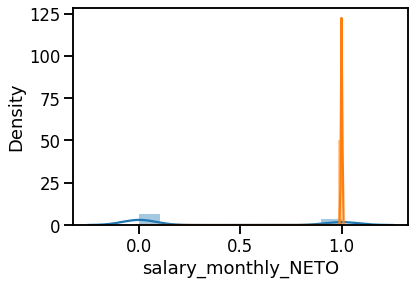

In [326]:
seaborn.distplot(df['salary_monthly_NETO'] > 94907.95)
seaborn.distplot( df['salary_monthly_NETO']< 1500000)

Filtrando por edad:

In [327]:
rows_to_delete = df[(df.profile_age < 19) | (df.profile_age > 70 ) ].index
df_age_cleaned = df.drop(rows_to_delete)

Filtrando lenguaje "Ninguno"

In [328]:

df = df[df['tools_programming_languages'] != 'Ninguno']

Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es tools_programming_languages. Sus valores son strings con los lenguajes seleccionados separados por comas.

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.


In [329]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [330]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2502
1,sql,2145
2,html,1852
3,python,1471
4,java,1445
5,css,1237
6,bash/shell,992
7,php,887
8,.net,819
9,typescript,778


El grafico a continuación
 cuenta la frecuencia de las frecuencias: los lenguajes menos frecuentes son mayor cantidad

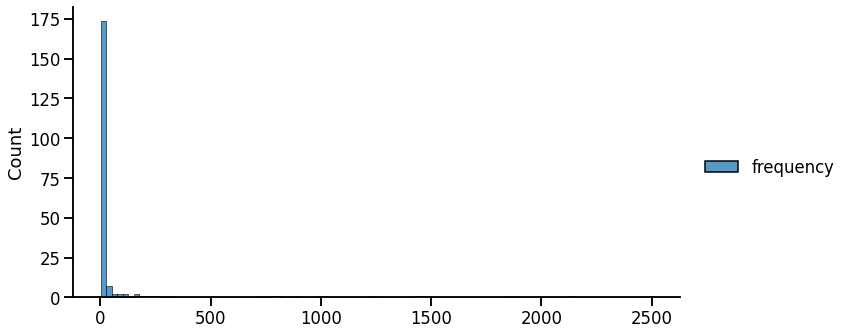

In [331]:
seaborn.displot(language_count, aspect=2, bins = 100)
#tamaño de bins = # de barritas
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')

#Medias del salario promedio por lenguaje

In [332]:
df_means =df_lang.groupby(['programming_language']).agg({'salary_monthly_NETO': ['mean']}).reset_index()

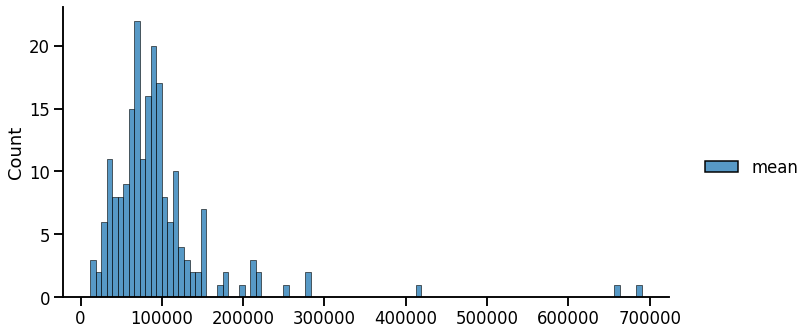

In [333]:
#tamaño de bins = # de barritas
seaborn.displot(df_means['salary_monthly_NETO'], aspect=2, bins = 100)
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')



Sacando las métricas útiles para esta distribución:

In [334]:
#dejamos solo 2 decimales
df_means.describe().round(2)

,salary_monthly_NETO
,mean
count,205.00
mean,95153.47
std,76648.76
min,12000.00
25%,60000.00
50%,82307.00
75%,105070.06
max,690000.00


La desviación estándar es demasiado grande, hay que filtrar valores extremos y con algún criterio extra.

# Filtrando por lenguajes populares

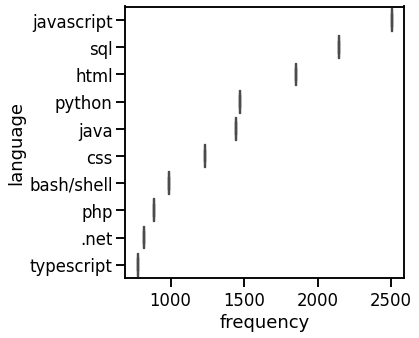

In [335]:
# Filter out languages that we want to exclude by frequency

language_count_popular = language_count[:10]
language_count_unpopular = language_count[10:]

plt.figure(figsize=(5, 5))
seaborn.boxplot(data=language_count_popular, y=language_count_popular.language, x=language_count_popular.frequency,
                color='orangered')
# plt.ticklabel_format(style='plain', axis='x')

Kimpiando posibles NaN values

In [336]:
df_lang.isna().sum()

programming_language           0
tools_programming_languages    0
salary_monthly_NETO            0
work_role                      0
cured_programming_languages    0
dtype: int64

In [337]:
# Filter out languages that we want to exclude, only keeping 10 of the most frequently used languages

popular_languages = language_count_popular.language.values.tolist()

popular_filtered_df_lang = df_lang[df_lang.programming_language.isin(popular_languages)]

popular_filtered_df_lang[:10]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Developer,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,css,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,php,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."


In [338]:
#Filtrando NaN values
popular_filtered_df_lang.isna().sum()

programming_language           0
tools_programming_languages    0
salary_monthly_NETO            0
work_role                      0
cured_programming_languages    0
dtype: int64

In [340]:

popular_filtered_df_lang[['cured_programming_languages']].isnull().sum()

cured_programming_languages    0
dtype: int64

#Medias del salario promedio por lenguaje FILTRADO POR POPULARIDAD:

In [342]:
df_means_popular = popular_filtered_df_lang.groupby(['programming_language']).agg({'salary_monthly_NETO': ['mean']}).reset_index()

EL TAMAÑO DE LOS BINS ACÁ CAMBIA MUCHO EL ASPECTO DEL HISTOGRAMA 
PROBAR 100, 200, 15 ,20 Y 30

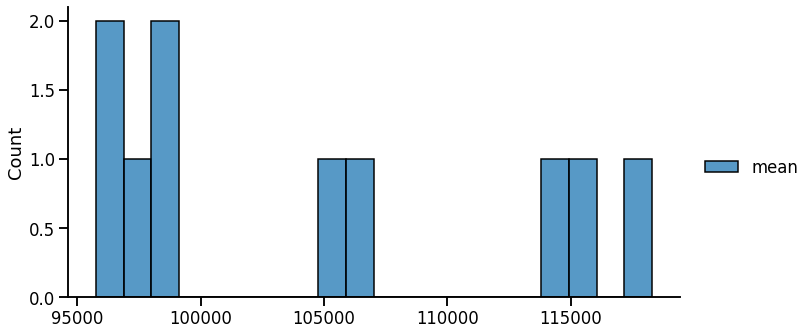

In [343]:
#tamaño de bins = # de barritas
seaborn.displot(df_means_popular['salary_monthly_NETO'], aspect=2, bins = 20)
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')

Sacando las métricas útiles para esta distribución: (no se que tanto sentido tiene siendo que claramente no es gaussiana)

In [344]:
#dejamos solo 2 decimales
df_means_popular.describe().round(2)

,salary_monthly_NETO
,mean
count,10.00
mean,104593.54
std,8560.05
min,95756.97
25%,97821.33
50%,101865.02
75%,112137.93
max,118295.66


In [354]:
df_means_popular.columns

MultiIndex([('programming_language',     ''),
            ( 'salary_monthly_NETO', 'mean')],
           )

NO PUEDO ORDENAR EL MULTIINDICE VERRRRR

In [360]:
df_means_popular.sort_values(by=[('programming_language',     ''),
            ( 'salary_monthly_NETO', 'mean')],ascending = False)[:20]

,programming_language,salary_monthly_NETO
,,mean
9,typescript,118295.657468
8,sql,96629.658955
7,python,115269.759450
6,php,98659.974417
5,javascript,106104.175011
4,java,105070.057967
3,html,97642.663788
2,css,98357.338108
1,bash/shell,114149.188009


# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
